In [1]:
import mne
import mne.io as mio

import numpy as np
import scipy.ndimage as sci

import pylab
import matplotlib.pyplot as plt
%matplotlib inline

/miniconda/envs/empty-maic2022/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Read edf files and pick Actigraphy

- num_normal = 71
- num_osa = 229
- num_test = 102

In [2]:
path = "/home/maic-player/dataset/"
picks = ['X axis', 'Y axis', 'Z axis']

In [9]:
xyz_raw_N = []
xyz_raw_A = []
xyz_raw_T = []

num_N = 71
num_A = 0
num_T = 0
for i in range(1, num_N + 1):
    xyz_raw_N.append(mio.read_raw_edf(path + "1_Train+Val/Normal_" + str(i).zfill(3) + ".edf")
                     .get_data(picks=picks))
for i in range(1, num_A + 1):
    xyz_raw_A.append(mio.read_raw_edf(path + "1_Train+Val/OSA_" + str(i).zfill(3) + ".edf")
                     .get_data(picks=picks))
for i in range(1, num_T + 1):
    xyz_raw_T.append(mio.read_raw_edf(path + "2_Test/Test_" + str(i).zfill(3) + ".edf")
                     .get_data(picks=picks))

Extracting EDF parameters from /home/maic-player/dataset/1_Train+Val/Normal_001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/maic-player/dataset/1_Train+Val/Normal_002.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/maic-player/dataset/1_Train+Val/Normal_003.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/maic-player/dataset/1_Train+Val/Normal_004.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/maic-player/dataset/1_Train+Val/Normal_005.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/maic-player/dataset/1_Train+Val/Normal_006.edf...
EDF file detected
Setting channel info structure...
Creating ra

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/maic-player/dataset/1_Train+Val/Normal_050.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/maic-player/dataset/1_Train+Val/Normal_051.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/maic-player/dataset/1_Train+Val/Normal_052.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/maic-player/dataset/1_Train+Val/Normal_053.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/maic-player/dataset/1_Train+Val/Normal_054.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/maic-player/dataset/1_Train+Va

# Draw One Actigraphy of normal

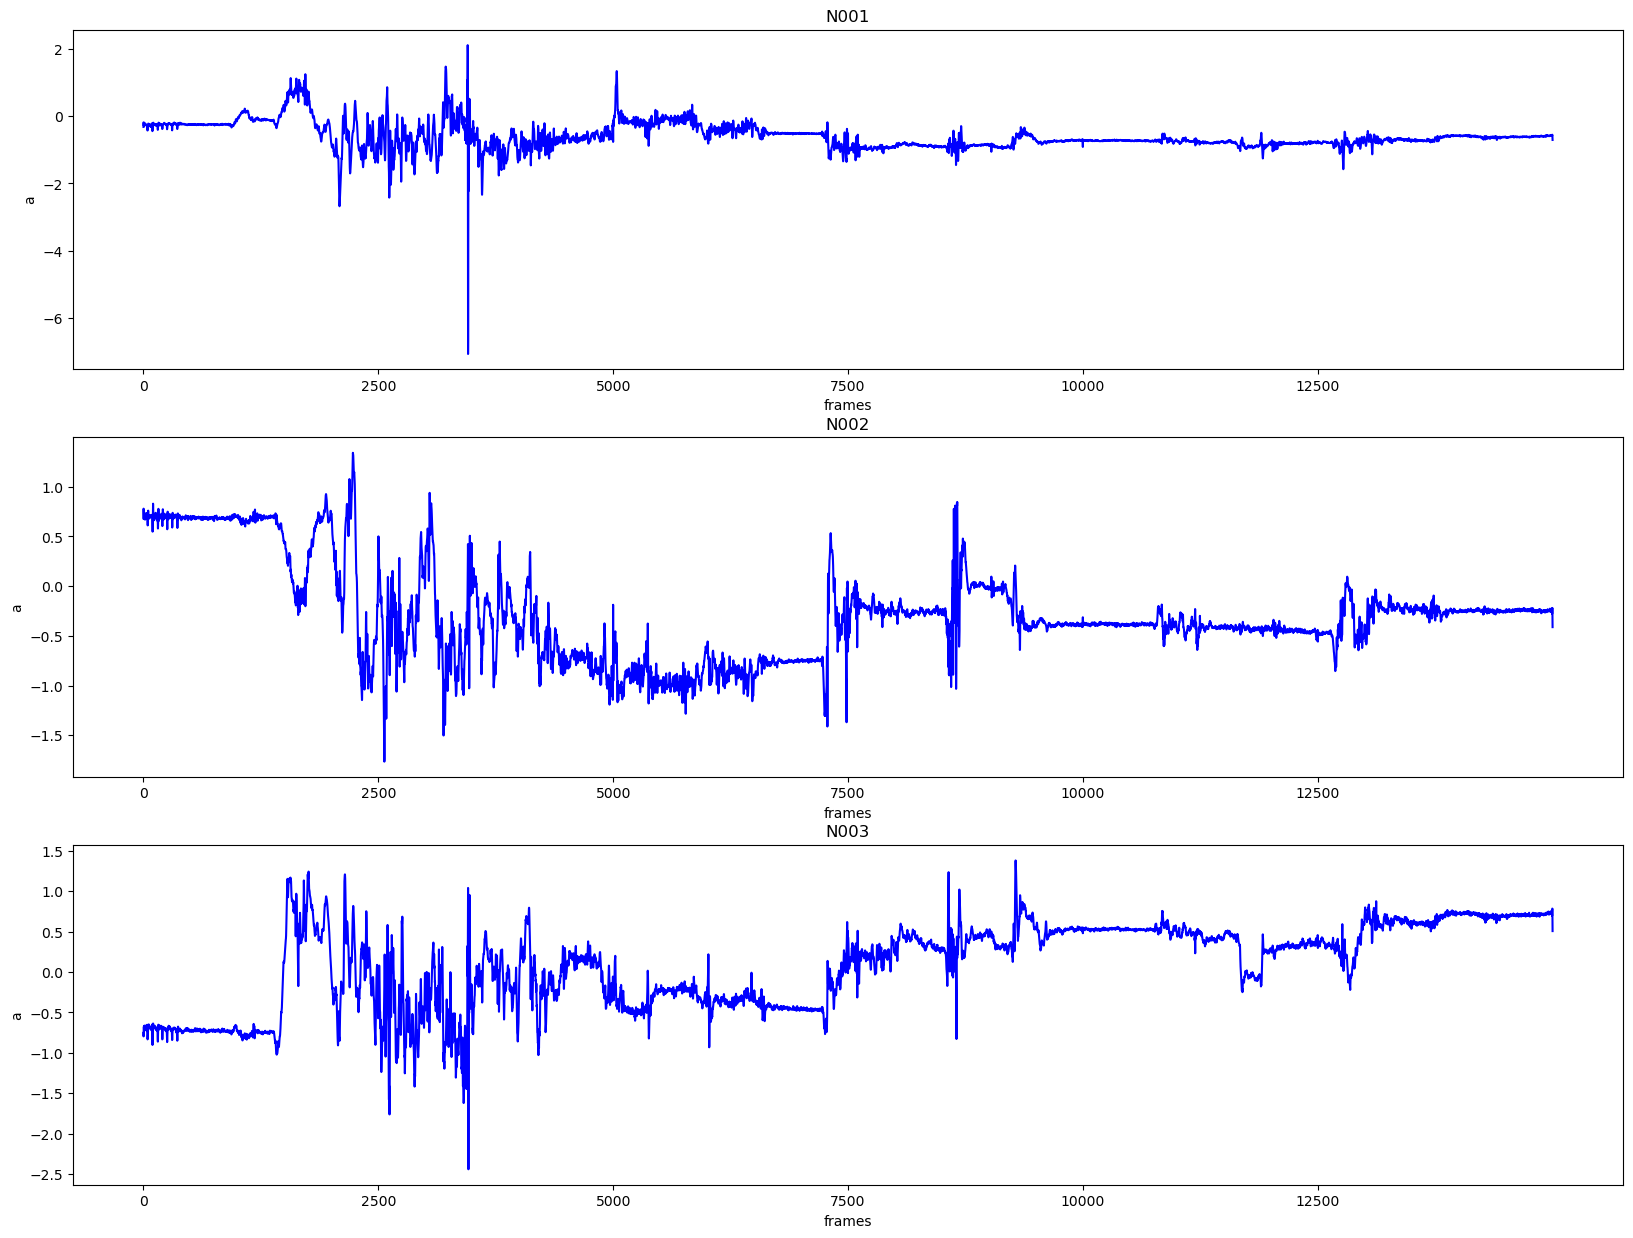

In [15]:
fig, graphs = plt.subplots(nrows=3, figsize = (20,15), dpi = 100)

for i in range(3):
    graphs[i].xaxis.set_ticks(np.arange(0, 15000, 2500))
    graphs[i].plot(xyz_raw_N[0][i][0:15000], color = 'blue')
    graphs[i].set_title("N" + str(i+1).zfill(3))
    graphs[i].set_xlabel('frames')
    graphs[i].set_ylabel('a')

# Make x + y + z in one vector

In [4]:
def get_size(vector_list):
    
    for i in range(len(vector_list)):
        vector_list[i] = np.square(vector_list[i])
    
    vector_size_list = []
    for i in range(len(vector_list)):
        vector_sum = vector_list[i][0] + vector_list[i][1] + vector_list[i][2]
        median = np.median(vector_sum)
        vector_size_list.append(np.abs(np.sqrt(vector_sum) - median))
    return vector_size_list

In [17]:
xyz_size_N = get_size(xyz_raw_N[:10])

In [ ]:
xyz_size_A = get_size(xyz_raw_A)

In [5]:
xyz_size_T = get_size(xyz_raw_T)

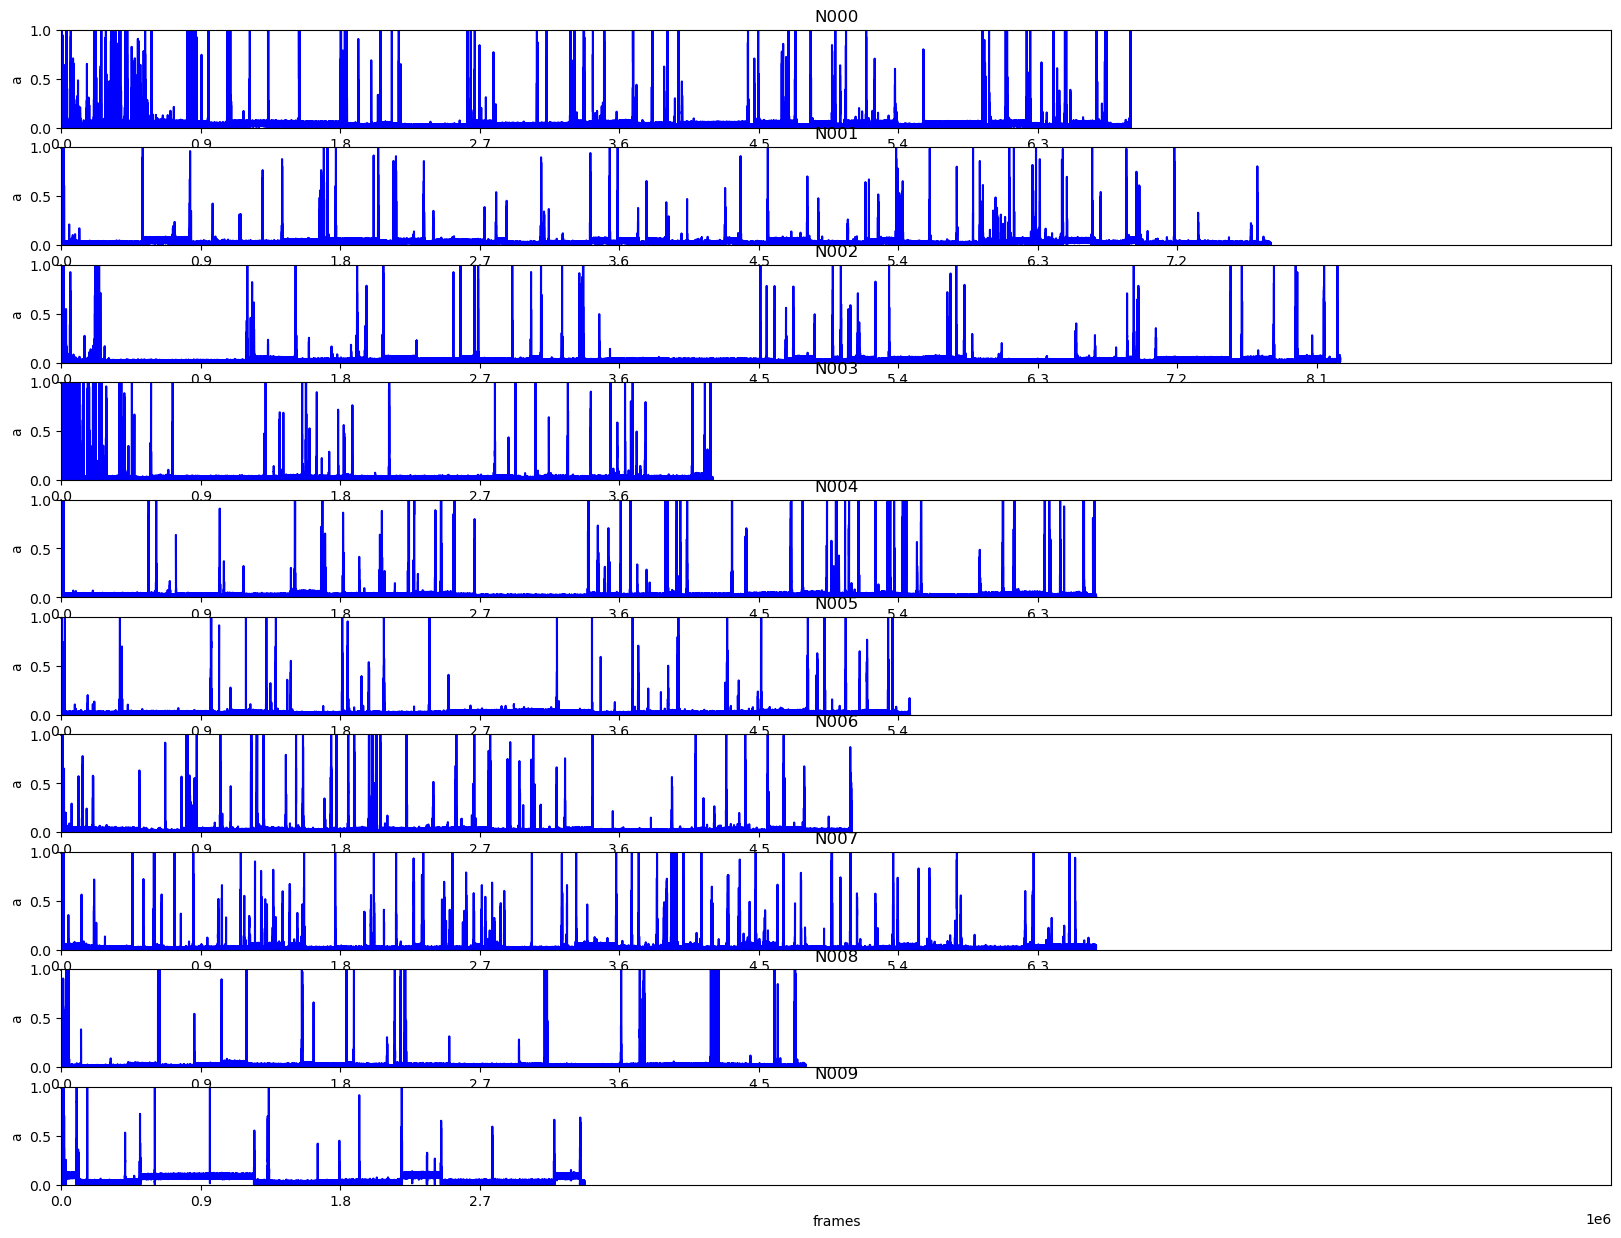

In [18]:
fig, graphs = plt.subplots(nrows=10, figsize = (20,15), dpi = 100)

for i in range(10):
    graphs[i].xaxis.set_ticks(np.arange(0, len(xyz_size_N[i])+1, 900000))
    graphs[i].plot(xyz_size_N[i], color = 'blue')
    graphs[i].axis([0,10000000,0,1])
    graphs[i].set_title("N" + str(i).zfill(3))
    graphs[i].set_xlabel('frames')
    graphs[i].set_ylabel('a')